In [1]:
import numpy as np
import pandas as pd

In [2]:
PATH = '../Data/airline_passengers.csv'

In [3]:
df = pd.read_csv(PATH, index_col=0, parse_dates=True)

In [4]:
df.index.freq = 'MS'

In [5]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [8]:
# Train Test Split

length = 109
train_data = df.iloc[:length]
test_data = df.iloc[length:]

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], 
                                    trend='mul', 
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

In [11]:
test_predictions = fitted_model.forecast(35)

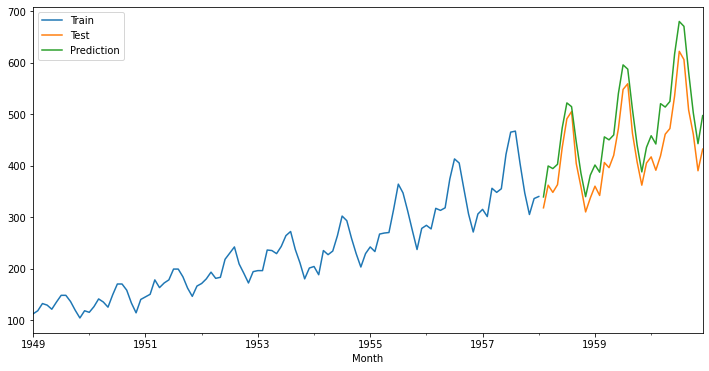

In [12]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12, 6))
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_predictions.plot(legend=True, label='Prediction')

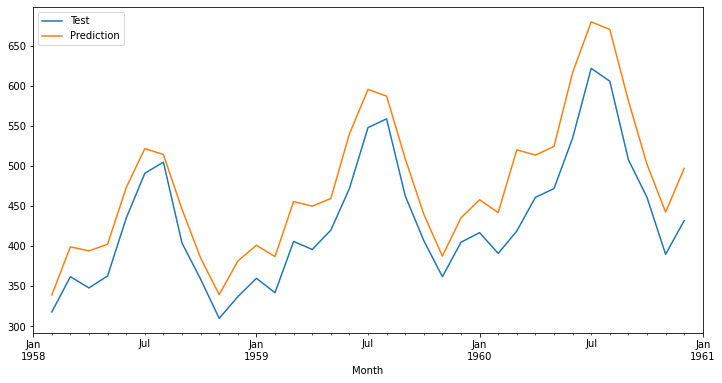

In [13]:
test_data['Thousands of Passengers'].plot(legend=True, label='Test', figsize=(12, 6))
test_predictions.plot(legend=True, label='Prediction', xlim=['1958-01-01', '1961-01-01'])

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
mean_absolute_error(test_data, test_predictions)

46.00952787184115

In [16]:
mean_squared_error(test_data, test_predictions)

2429.4623156650587

In [17]:
mean_squared_error(test_data, test_predictions) ** 0.5

49.289576135984966

In [18]:
test_data.describe()

,Thousands of Passengers
count,35.000000
mean,431.028571
std,79.001670
min,310.000000
25%,362.500000
50%,417.000000
75%,472.000000
max,622.000000


In [19]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], 
                                    trend='mul', 
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

In [20]:
forecast_predictions = final_model.forecast(35)

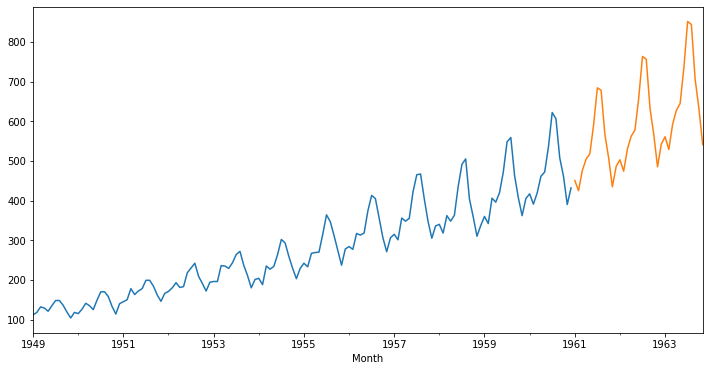

In [21]:
df['Thousands of Passengers'].plot(figsize=(12,6))
forecast_predictions.plot()

In [22]:
df2 = pd.read_csv('../Data/samples.csv', index_col=0, parse_dates=True)

In [23]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


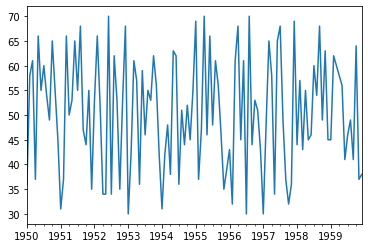

In [24]:
# STATIONARY Data: No Trend, No Seasonality

df2['a'].plot()

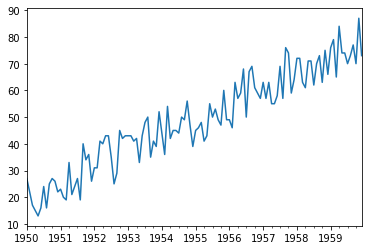

In [25]:
# NON-STATIONARY Data

df2['b'].plot()

In [26]:
from statsmodels.tsa.statespace.tools import diff

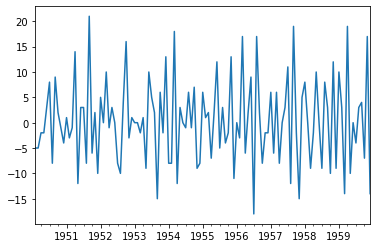

In [27]:
# df2['b'] - df2['b'].shift(1)

diff(df2['b'], k_diff=1).plot()